# CIFAR-10 classification


In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [23]:
## Define basic transformation and define the datasets

train_transform = transforms.Compose([
  transforms.ToTensor()
])


train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=train_transform,
)

test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
)

classes = train_dataset.classes

train_dataset, test_dataset, classes

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test,
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [11]:
## Create the dataloaders

BATCH_SIZE = 32

trainloader = DataLoader(train_dataset,
                         batch_size = BATCH_SIZE,
                         shuffle = True )


testloader = DataLoader(test_dataset,
                         batch_size = BATCH_SIZE,
                         shuffle = False )

trainloader, testloader

(<torch.utils.data.dataloader.DataLoader at 0x79b5c60ccbd0>,
 <torch.utils.data.dataloader.DataLoader at 0x79b5c5f38e90>)

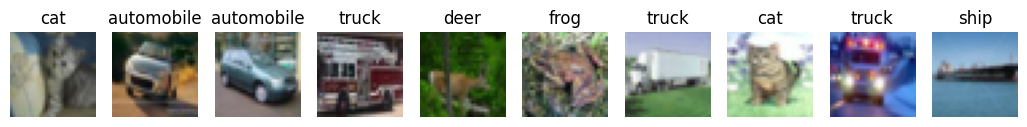

In [31]:
## Data visualization

def show_images(loader: DataLoader, num_images: int):
  images, labels = next(iter(loader))

  fig, ax = plt.subplots(1, num_images, figsize=(13,2))

  for i in range(num_images):
    img = images[i]
    ax[i].imshow(np.transpose(img, (1,2,0)))
    ax[i].set_title(f'{classes[labels[i]]}') # Print the titles
    ax[i].axis('off') # Deactivate axes

show_images(trainloader, 10)
